In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("../data/netflix_reviews.csv")
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,020e683f-4f1b-4607-b486-e6aac09ddaf3,april Balay,super excited movie enjoy super,5,0,NaN,2026-01-23 10:35:09,NaN
1,0ae2bcc5-74ba-4e5d-adb5-3e0b5b45839f,Jhinro Cabanada,no resolution choice,1,0,9.49.1 build 6 63792,2026-01-23 09:59:06,9.49.1 build 6 63792
2,2c64dec4-6520-4962-baeb-e1a3244a4217,Satish Pandey,Good app but very expensive and also needs imp...,5,0,9.49.1 build 6 63792,2026-01-23 09:41:07,9.49.1 build 6 63792
3,b6eda391-b5ac-4981-9f8f-60c416eb329e,Chris Hinton,Cast to TV option has been removed.,1,0,9.49.1 build 6 63792,2026-01-23 09:35:09,9.49.1 build 6 63792
4,d70b7712-4042-4566-90b7-cfde61f6f586,Matthew Smallwood,Would be great if I wasn't cut off in the midd...,1,0,9.49.1 build 6 63792,2026-01-23 09:29:16,9.49.1 build 6 63792


In [51]:
df.shape

(145629, 8)

In [52]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145629 entries, 0 to 145628
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              145629 non-null  object
 1   userName              145627 non-null  object
 2   content               145623 non-null  object
 3   score                 145629 non-null  int64 
 4   thumbsUpCount         145629 non-null  int64 
 5   reviewCreatedVersion  119992 non-null  object
 6   at                    145629 non-null  object
 7   appVersion            119992 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.9+ MB


In [54]:
df.isnull().sum()


reviewId                    0
userName                    2
content                     6
score                       0
thumbsUpCount               0
reviewCreatedVersion    25637
at                          0
appVersion              25637
dtype: int64

In [55]:
(df.isnull().sum() / len(df)) * 100


reviewId                 0.000000
userName                 0.001373
content                  0.004120
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion    17.604323
at                       0.000000
appVersion              17.604323
dtype: float64

In [56]:
df[df['content'].isnull()]


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
11388,6b66631b-6bc9-4d7e-adbf-77660acda47c,Cambria,NaN,1,1,9.11.1 build 10 62492,2025-04-20 00:16:34,9.11.1 build 10 62492
21795,5b06f098-6edd-4e7d-8a58-84f9a65f08e8,shenshi pang,NaN,3,0,8.31.1 build 14 50243,2025-01-03 11:50:11,8.31.1 build 14 50243
25427,3363e119-6469-4dd8-b6a2-9fc67c919e87,John Relles,NaN,5,0,8.132.2 build 18 50846,2024-12-02 02:54:46,8.132.2 build 18 50846
26864,49eda233-7487-41e6-8eb4-aeff02a906f0,Hetekia Kingi,NaN,5,0,8.138.1 build 10 50974,2024-11-10 03:49:25,8.138.1 build 10 50974
35945,a73c931f-5cce-4863-b1ae-40101455f137,Maria Wiley,NaN,5,0,8.114.0 build 19 50680,2024-05-21 16:56:29,8.114.0 build 19 50680
36296,839d55ed-ba9e-4753-a178-5799b9f86ffc,Myris Guilanda,NaN,2,0,NaN,2024-05-19 13:52:42,NaN


In [57]:
df = df.dropna(subset=['content'])
df['content'].isnull().sum()

np.int64(0)

In [58]:
df = df.dropna(subset=['userName'])
df['userName'].isnull().sum()

np.int64(0)

In [59]:
df.drop(columns=['reviewCreatedVersion', 'appVersion'], inplace=True)
df

,reviewId,userName,content,score,thumbsUpCount,at
0,020e683f-4f1b-4607-b486-e6aac09ddaf3,april Balay,super excited movie enjoy super,5,0,2026-01-23 10:35:09
1,0ae2bcc5-74ba-4e5d-adb5-3e0b5b45839f,Jhinro Cabanada,no resolution choice,1,0,2026-01-23 09:59:06
2,2c64dec4-6520-4962-baeb-e1a3244a4217,Satish Pandey,Good app but very expensive and also needs imp...,5,0,2026-01-23 09:41:07
3,b6eda391-b5ac-4981-9f8f-60c416eb329e,Chris Hinton,Cast to TV option has been removed.,1,0,2026-01-23 09:35:09
4,d70b7712-4042-4566-90b7-cfde61f6f586,Matthew Smallwood,Would be great if I wasn't cut off in the midd...,1,0,2026-01-23 09:29:16
...,...,...,...,...,...,...
145624,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03
145625,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30
145626,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58
145627,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42


In [60]:
df.isnull().sum()


reviewId         0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [61]:
score_counts = df['score'].value_counts().sort_index()
score_counts

score
1    57061
2    12756
3    13964
4    16017
5    45823
Name: count, dtype: int64

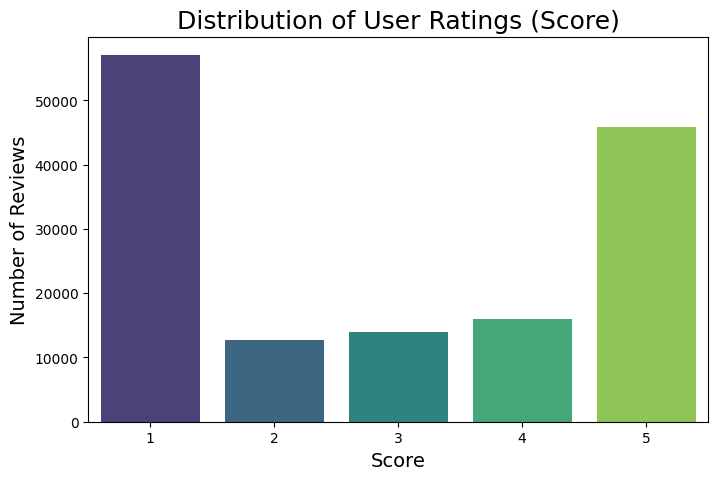

In [ ]:
plt.figure(figsize=(8,5))
colors = sns.color_palette("viridis", len(score_counts))
sns.barplot(
    x=score_counts.index, 
    y=score_counts.values, 
    hue=score_counts.index,   
    palette=colors,
    dodge=False,              
    legend=False              
)
plt.title("Distribution of User Ratings (Score)", size=18)
plt.xlabel("Score", size=14)
plt.ylabel("Number of Reviews", size=14)
plt.show()
